In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn import metrics, model_selection, svm
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

In [39]:
def NormZscore(data):
    mean = np.mean(data, axis = 0)
    data_int = data - mean
    sdt = np.std(data, axis = 0)
    data_norm = data_int / sdt

    return data_norm, mean, sdt

def DesnZscore(data,m,s):
    return data * s + m

def metrics(y, y_pred):

    y = y.astype('bool')
    y_pred = y_pred.astype('bool')

    TP = sum(y & y_pred) 
    TN = sum(~y & ~y_pred)
    FP = sum(~y & y_pred)
    FN = sum(y & ~y_pred)

    precision = TP / (TP + FP)
    accuracy = (TP + TN)/(TP + FP + TN + FN)
    recall = TP /(TP+FN)
    f1 = 2*(precision * recall)/(precision + recall)
    cm = np.array([[ TP, TN ], [ FP, FN ]])

    if np.isnan(precision):
        precision = 0
    if np.isnan(accuracy):
        accuracy = 0
    if np.isnan(recall):
        recall = 0
    if np.isnan(f1):
        f1 = 0
    
    print("acurácia: %.8f" % accuracy)
    print("revocação: %.8f" % precision)
    print("precisão: %.8f" % recall)
    print("f1-score: %.8f" % f1)
    print("")
    
    return precision, accuracy, recall, f1

In [3]:
calif_data = np.genfromtxt('./californiabin.csv', delimiter=',')
np.random.seed(666)
feat = np.arange(8)
lab = 8

X = calif_data[:,0:8]
y = calif_data[:,8]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
parameters = {
    
    'C' : np.logspace(-5, 15, num=15-5+1, base=2),
    'gamma': [2**-15, 2**-13, 2**-11, 2**-9, 2**-7, 2**-5, 2**-3, 2**-1, 2, 2**2, 2**3]

}

svm = svm.SVC(kernel='rbf')
grid_svm = GridSearchCV(svm, cv=10, param_grid=parameters)
grid_svm.fit(X_train, y_train)
y_pred = grid_svm.predict(X_test)

In [6]:
print("Modelo: SVM")
print("-" * 30)
print("Chosen Hiperparameters: ", grid_svm.best_params_)
print(metrics(y_test,y_pred))
print("-" * 30)

Modelo: SVM
------------------------------
Chosen Hiperparameters:  {'C': 8192.0, 'gamma': 3.0517578125e-05}
acurácia: 0.80888889
revocação: 0.79302832
precisão: 0.82539683
f1-score: 0.80888889

(0.7930283224400871, 0.8088888888888889, 0.8253968253968254, 0.8088888888888889)
------------------------------


Modelo: SVM - ROC
------------------------------


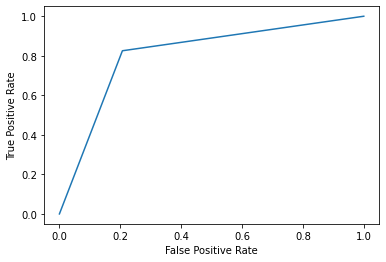

In [23]:
print("Modelo: SVM - ROC")
print("-" * 30)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()


Modelo: SVM - Prec_Rec Curve


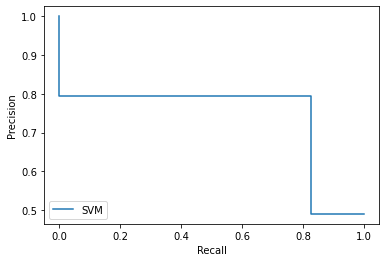

In [25]:
print("Modelo: SVM - Prec_Rec Curve")

precision_, recall_, _ = metrics.precision_recall_curve(y_test, y_pred)
display = metrics.PrecisionRecallDisplay(precision_, recall_, estimator_name="SVM")
display.plot()
plt.show()

In [26]:
parameters_ = {
 
    'n_estimators' : np.arange(10, 210, step=10),
    'max_depth': [2, 4, 6, 8, None]

}

rf = RandomForestClassifier()
gridRf = GridSearchCV(rf, cv=10, param_grid=parameters_)
gridRf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, None],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [31]:
y_pred = gridRf.predict(X_test)

In [41]:
print("Model: Random Forest")
print("-" * 30)
print("Chosen Hiperparameters: ", gridRf.best_params_)
print(metrics(y_test, y_pred))
print("-" * 30)

Model: Random Forest
------------------------------
Chosen Hiperparameters:  {'max_depth': None, 'n_estimators': 120}
acurácia: 0.89555556
revocação: 0.88641425
precisão: 0.90249433
f1-score: 0.89438202

(0.8864142538975501, 0.8955555555555555, 0.9024943310657596, 0.89438202247191)
------------------------------


Model: Random Forest - ROC
------------------------------


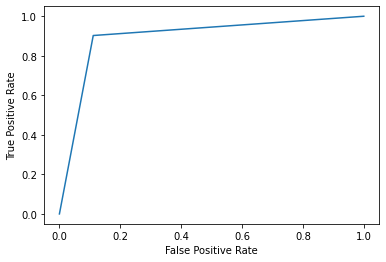

Modelo: SVM - Prec_Rec Curve


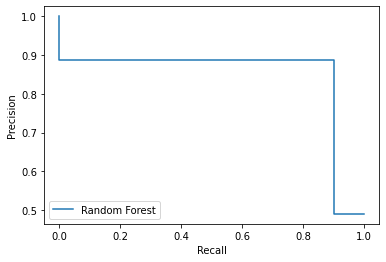

In [44]:
print("Model: Random Forest - ROC")
print("-" * 30)

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

print("Modelo: SVM - Prec_Rec Curve")

precision_, recall_, _ = metrics.precision_recall_curve(y_test, y_pred)
display = metrics.PrecisionRecallDisplay(precision_, recall_, estimator_name="Random Forest")
display.plot()
plt.show()